In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

In [6]:
df.size

34720

In [8]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [9]:
df.duplicated().sum()

763

In [10]:
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [107]:
df.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [11]:
df.drop_duplicates(keep='first',inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(3577, 8)

<Axes: ylabel='name'>

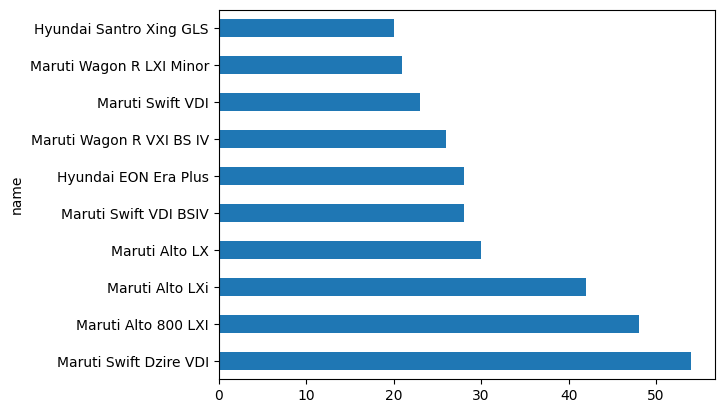

In [234]:
df['name'].value_counts().head(10).plot(kind='barh')

<Axes: xlabel='transmission', ylabel='count'>

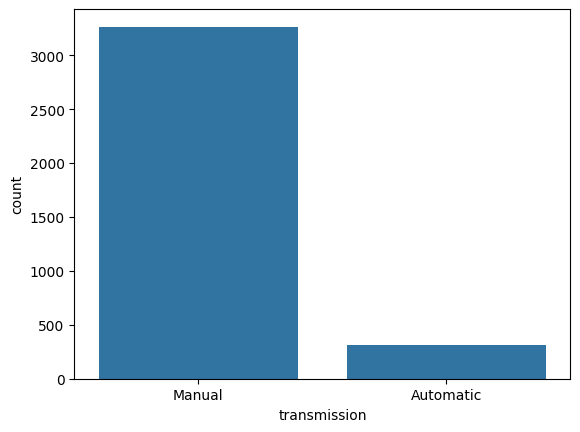

In [189]:
sns.countplot(data=df,x='transmission')

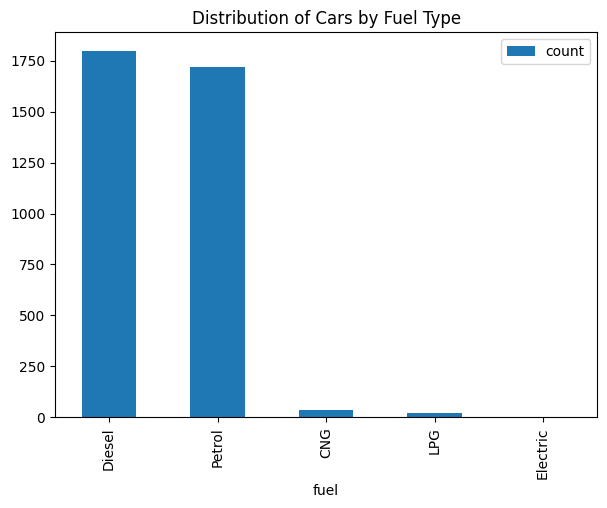

In [243]:
plt.figure(figsize=(7, 5))
df['fuel'].value_counts().plot(kind='bar')
plt.title('Distribution of Cars by Fuel Type')
plt.ylabel('')
plt.legend()
plt.show()

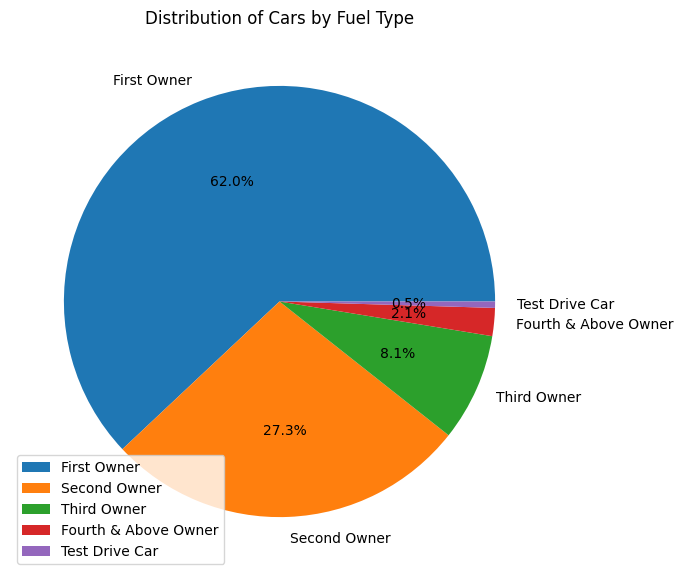

In [230]:
plt.figure(figsize=(7, 7))
df['owner'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Cars by Fuel Type')
plt.ylabel('')
plt.legend()
plt.show()

PRICING AND MARKET TREND

<Axes: xlabel='selling_price', ylabel='Count'>

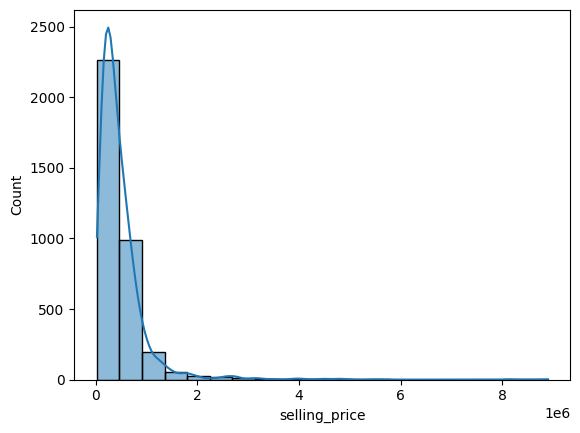

In [191]:
sns.histplot(df['selling_price'],bins=20 ,kde=True)

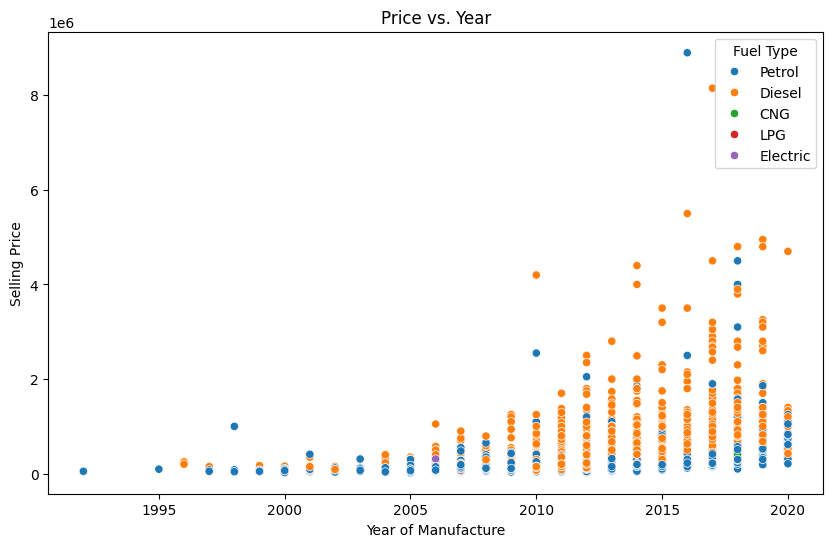

In [185]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=df, x='year', y='selling_price', hue='fuel')
plt.title('Price vs. Year')
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price')
plt.legend(title='Fuel Type')
plt.show()

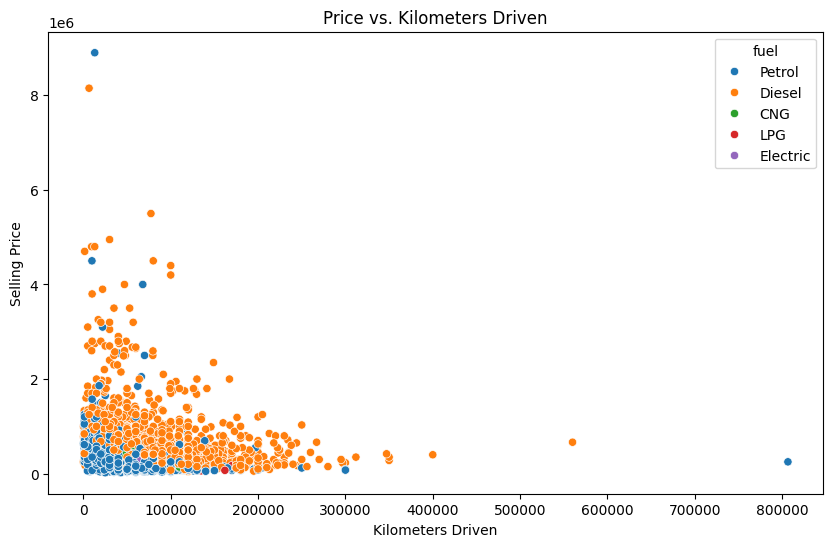

In [199]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='km_driven', y='selling_price', hue='fuel')
plt.title('Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

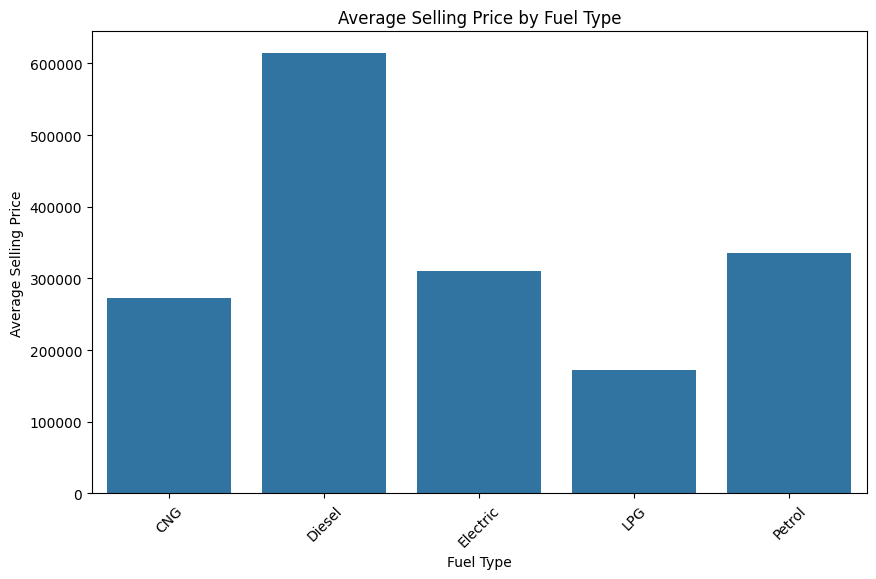

In [224]:
# Calculate the average selling price by fuel type
avg_price_by_fuel = df.groupby('fuel')['selling_price'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_fuel, x='fuel', y='selling_price')

# Customize the plot
plt.title('Average Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary for better readability
plt.show()

FEATURE IMAPCT ON CAR PRICE

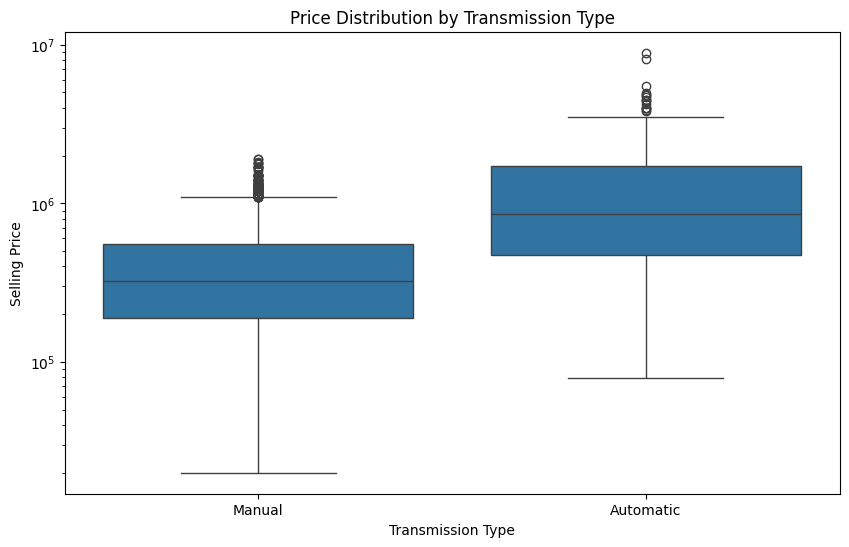

In [215]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='transmission', y='selling_price')

# Customize the plot
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.yscale('log')  # Log scale to better visualize price distribution if there's a large range
plt.show()

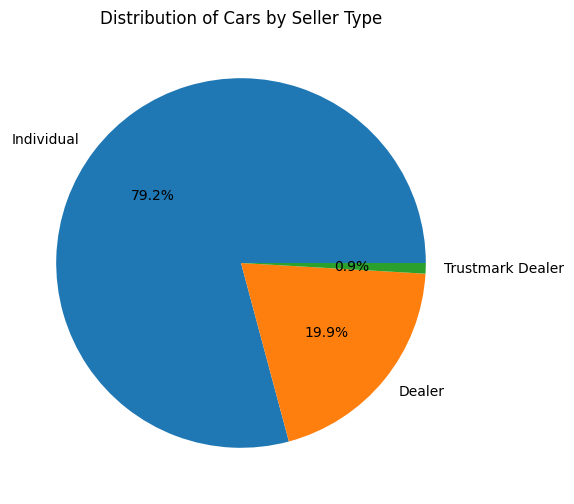

In [218]:
plt.figure(figsize=(8, 6))
df['seller_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Cars by Seller Type')
plt.ylabel('')
plt.show()


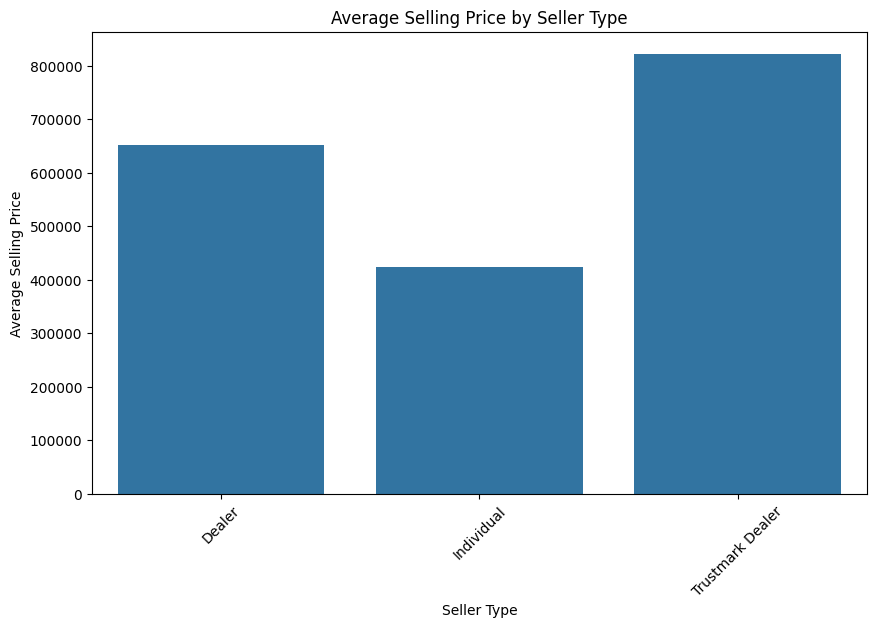

In [217]:
# Calculate the average selling price by seller type
avg_price_by_seller = df.groupby('seller_type')['selling_price'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_seller, x='seller_type', y='selling_price')

# Customize the plot
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

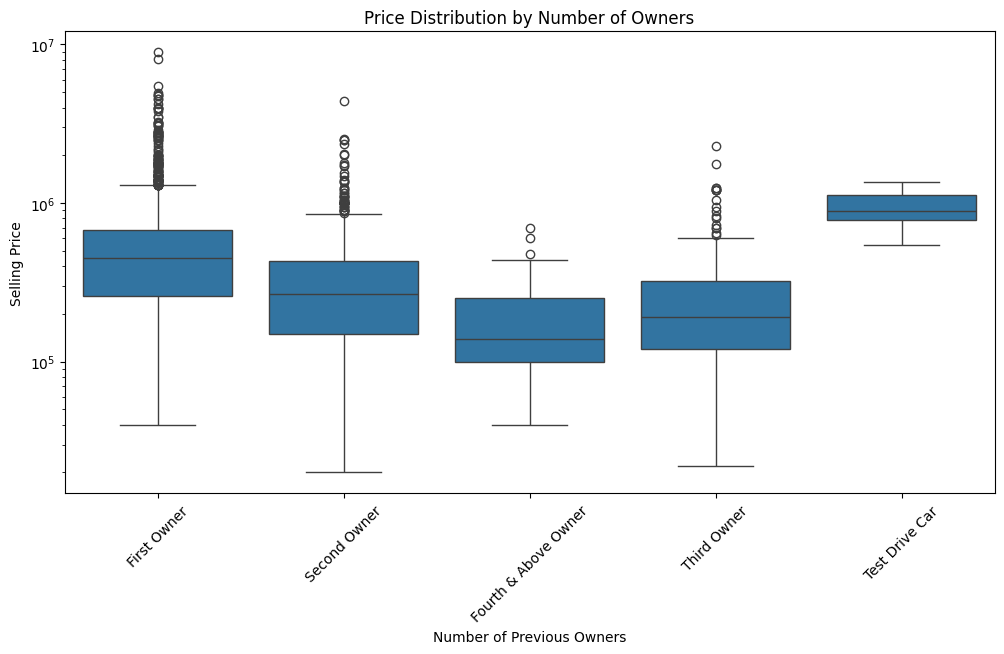

In [227]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='owner', y='selling_price')

# Customize the plot
plt.title('Price Distribution by Number of Owners')
plt.xlabel('Number of Previous Owners')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yscale('log')  # Apply log scale if there's a large range in prices
plt.show()

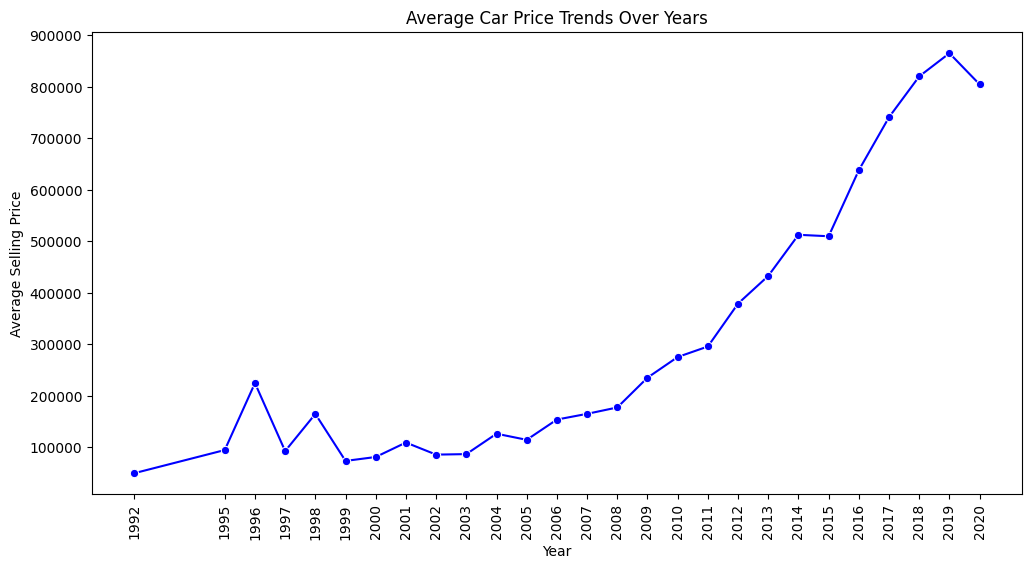

In [244]:
avg_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_price_by_year, x='year', y='selling_price', marker='o', color='b')

# Customize the plot
plt.title('Average Car Price Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')

plt.xticks(avg_price_by_year['year'],rotation=90)  # Ensure all years are shown on the x-axis
plt.show()